# Week 5 exercise: Simple MD simulations

- Implement a numerical simulation of the dynamics of an Harmonic oscillator, using the verlet algorithm to integrate the equations of motion. 

- Represent the dynamics of the harmonic oscillator in phase space. 

- Is the total energy conserved? 

- What happens by changing the timestep? 



## System Setup

In [20]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

## Parameters
m=1.0; #mass
k=2; # Harmonic Constant
req=1.5; #Equilirbium 
##

## Initial Conditions
r0=1.0; # Initial position
v0=.5;  # Initial velocity


## Timestep / Total time
dt=0.001; #timestep
total_time=50; 
nsteps=int(total_time/dt); # Total number of steps

## Iitialise vectors
v=np.zeros(nsteps)
r=np.zeros(nsteps)
time=np.zeros(nsteps)
POT=np.zeros(nsteps)
KIN=np.zeros(nsteps)

In [12]:
## Useful functions
force=lambda r, k, req, : -k*(r-req)
energy_pot=lambda r, k, req: 0.5*k*np.power(r-req,2)
velocity=lambda r, r_past, dt: (r-r_past)/dt
energy_kin=lambda v, m: 0.5*m*np.power(v,2)

verlet=lambda r, r_past, force, mass, dt:  2*r-r_past+(dt**2)*force/mass

# initialise position and velocity

time[0]=0;
time[1]=dt;
v[0]=v0;
r[0]=r0;
r[1]=r[0]+v[0]*dt
v[1]=velocity(r[0],r[1],dt);

for i in np.arange(0,2):
    POT[i]=energy_pot(r[i],k,req)
    KIN[i]=energy_kin(v[i],m)

### Compute Trajectory

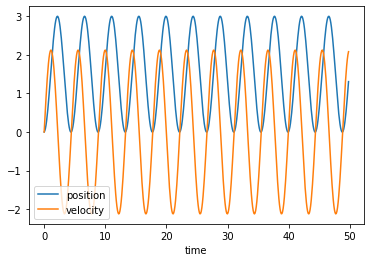

In [17]:
# Compute trajectory
for ts in np.arange(1,nsteps-1): #Cycle over timesteps
    f=force(r[ts],k,req)
    
    r[ts+1]=verlet(r[ts],r[ts-1],f,m,dt)
    time[ts+1]=time[ts]+dt
    
    v[ts+1]=velocity(r[ts+1],r[ts],dt)
    
    POT[ts+1]=energy_pot(r[ts+1],k,req)
    KIN[ts+1]=energy_kin(v[ts+1],m)
    

plt.plot(time,r,label='position');
plt.plot(time,v,label='velocity');
plt.legend();
plt.xlabel('time');


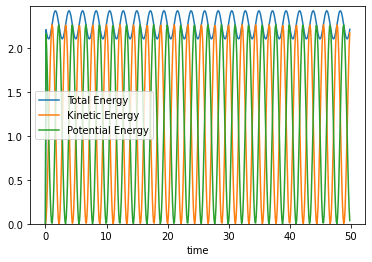

In [18]:
plt.plot(time,POT+KIN,label='Total Energy')
plt.plot(time,KIN,label='Kinetic Energy')
plt.plot(time,POT,label='Potential Energy')
plt.ylim([0, np.max(POT+KIN)+0.05])
plt.legend()
plt.xlabel('time');

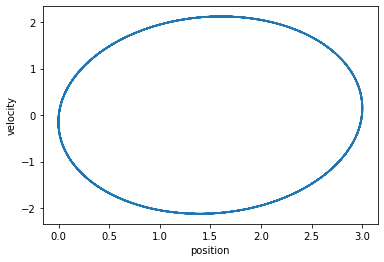

In [19]:
plt.plot(r[2:],v[2:])
plt.xlabel('position');
plt.ylabel('velocity');